Weights:  [0.1 0.1]  Bias:  0.0  Total Error:  2
Weights:  [0.2 0.1]  Bias:  -0.1  Total Error:  3
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  3
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0
Weights:  [0.2 0.1]  Bias:  -0.20000000000000004  Total Error:  0


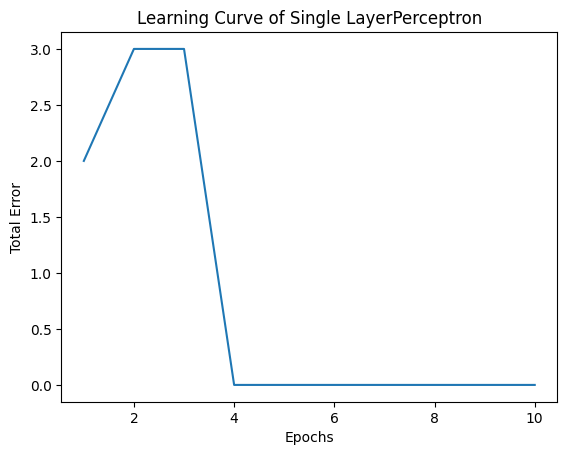

In [ ]:
#Example:1

import numpy as np
import matplotlib.pyplot as plt
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y =np.array([0,0,0,1])
w = np.zeros(2)
b = 0
eta = 0.1
errors_per_epoch=[]
for epoch in range(10):
  total_error = 0
  for i in range(len(X)):
    z = np.dot(X[i], w) + b
    y_pred = 1 if z >= 0 else 0
    error = y[i] - y_pred
    w = w + eta * error * X[i]
    b = b + eta * error
    total_error += abs(error)
  print("Weights: ", w," Bias: ",b," Total Error: ",total_error)
  errors_per_epoch.append(total_error)
plt.plot(range(1,11),errors_per_epoch)
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve of Single LayerPerceptron")
plt.show()

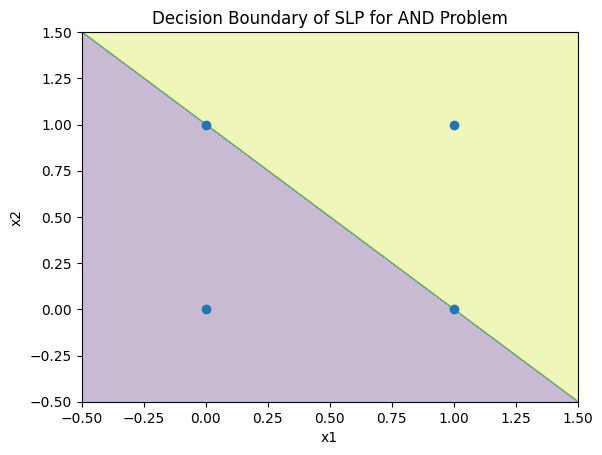

In [ ]:
#Example:2

from sklearn.linear_model import Perceptron

slp = Perceptron(max_iter=1000, eta0=0.1,random_state=1)
slp.fit(X, y)
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max,300),np.linspace(y_min, y_max, 300))

# Predict over grid
Z = slp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of SLP for AND Problem")
plt.show()

Predicted Output: [0 1 1 0]
Actual Output : [0 1 1 0]


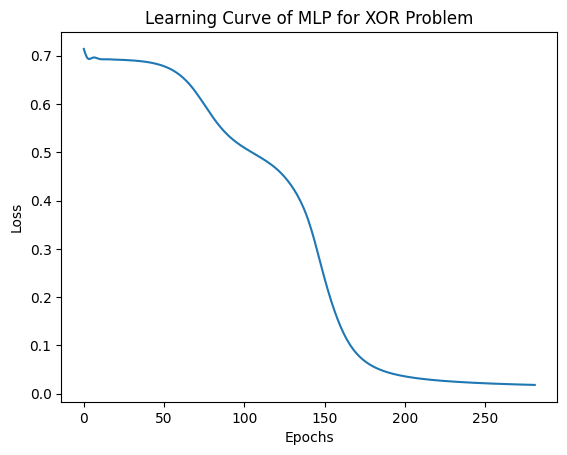

In [ ]:
#Example:3

from sklearn.neural_network import MLPClassifier
import numpy as np
# XOR dataset
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])
# MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,),activation='logistic',solver='sgd',learning_rate_init=0.5,max_iter=5000,random_state=1)
mlp.fit(X, y)
pred = mlp.predict(X)
print("Predicted Output:", pred)
print("Actual Output :", y)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP for XOR Problem")
plt.show()

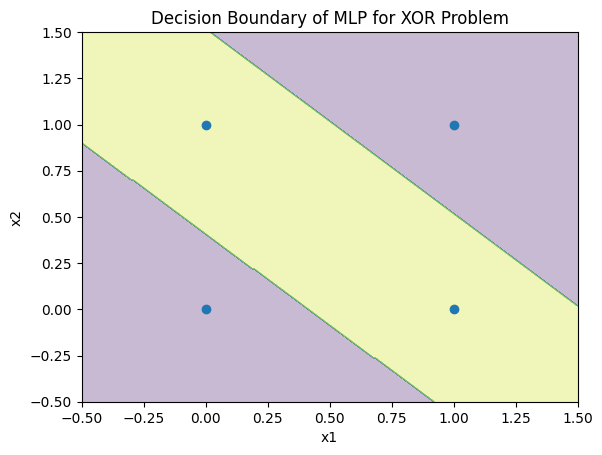

In [ ]:
#Example:4

x_min, x_max =-0.5, 1.5
y_min, y_max =-0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))
# Predict over grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of MLP for XOR Problem")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9333333333333333


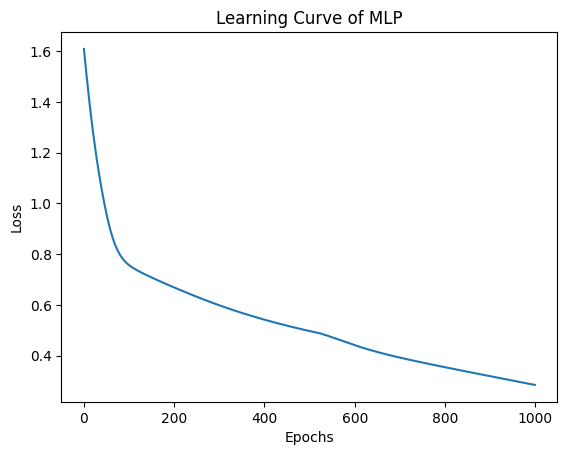

In [ ]:
#Example:5

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(10,),
activation='relu',
max_iter=1000,
random_state=1)
mlp.fit(X_train, y_train)
# Predict
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP")
plt.show()

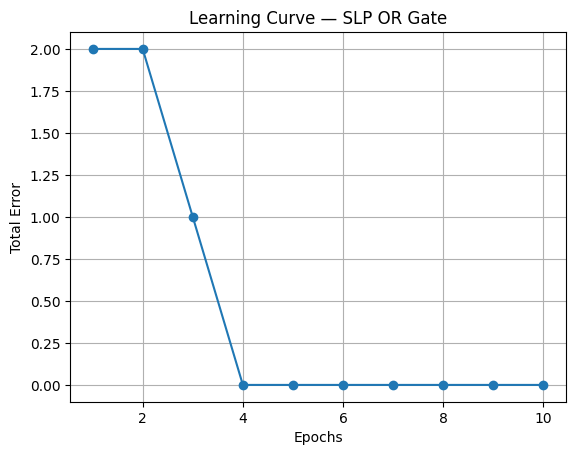

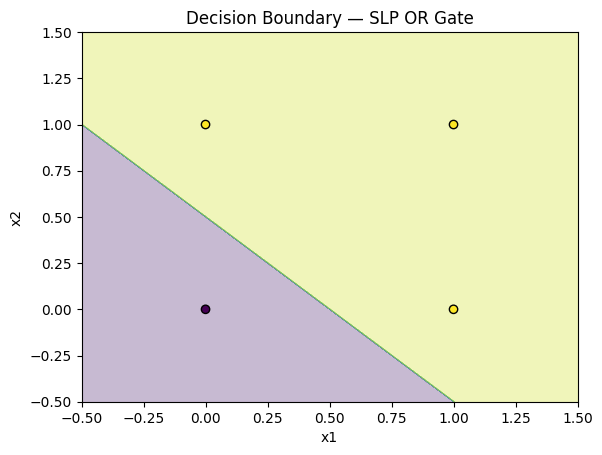

In [4]:
#Excercise:1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([0,1,1,1])
epochs=10
eta=0.1
def train_slp(X, y, epochs, eta):
    w = np.zeros(X.shape[1])
    b = 0
    errors_per_epoch=[]
    for _ in range(epochs):
        total_error = 0
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = 1 if z >= 0 else 0
            error = y[i] - y_pred
            w += eta * error * X[i]
            b += eta * error
            total_error += abs(error)
        errors_per_epoch.append(total_error)
    return errors_per_epoch

errors_or = train_slp(X_or, y_or, epochs, eta)


plt.plot(range(1, len(errors_or)+1), errors_or, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve — SLP OR Gate")
plt.grid(True)
plt.show()

slp_or = Perceptron(eta0=0.1, max_iter=1000, random_state=1)
slp_or.fit(X_or, y_or)

x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))

Z = slp_or.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_or[:,0], X_or[:,1], c=y_or, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary — SLP OR Gate")
plt.show()

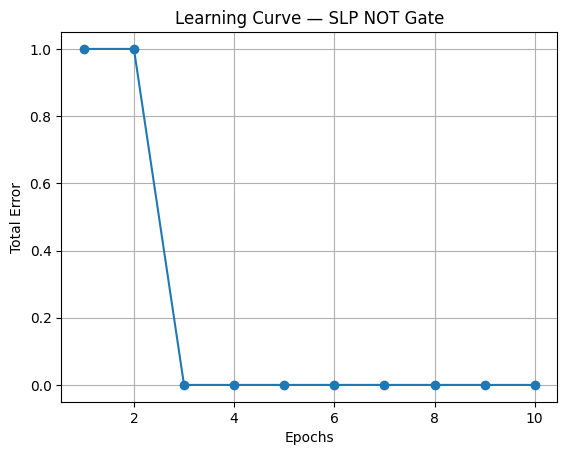

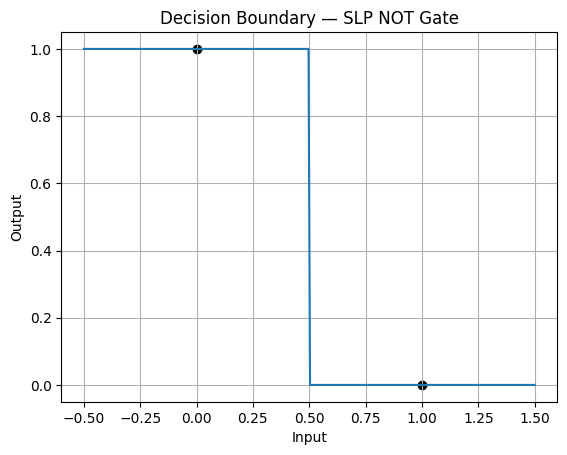

In [6]:
#Excercise:2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

def train_slp(X, y, epochs=10, eta=0.1):
    w = np.zeros(X.shape[1])
    b = 0
    errors_per_epoch = []

    for _ in range(epochs):
        total_error = 0
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = 1 if z >= 0 else 0
            error = y[i] - y_pred
            w += eta * error * X[i]
            b += eta * error
            total_error += abs(error)
        errors_per_epoch.append(total_error)
    return errors_per_epoch

X_not = np.array([
    [0],
    [1]
])

y_not = np.array([1, 0])

errors_not = train_slp(X_not, y_not)

plt.plot(range(1, len(errors_not)+1), errors_not, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve — SLP NOT Gate")
plt.grid(True)
plt.show()

slp_not = Perceptron(eta0=0.1, max_iter=1000, random_state=1)
slp_not.fit(X_not, y_not)

x_vals = np.linspace(-0.5, 1.5, 300).reshape(-1,1)
y_vals = slp_not.predict(x_vals)

plt.plot(x_vals, y_vals, label="Decision Line")
plt.scatter(X_not, y_not, color='black')
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Decision Boundary — SLP NOT Gate")
plt.grid(True)
plt.show()


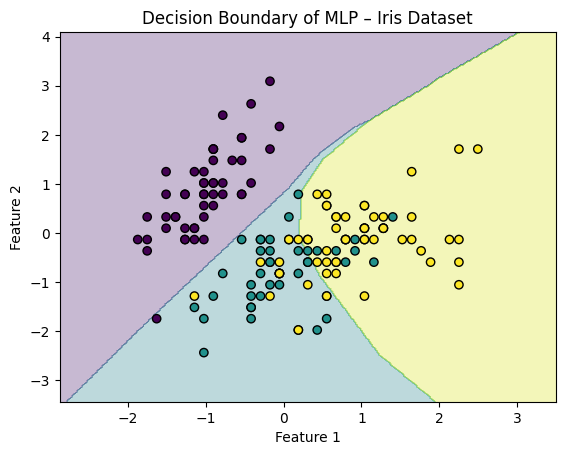

In [13]:
#Example:3 (Decision Boundary for Example:5)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=1)
mlp.fit(X, y)

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of MLP – Iris Dataset")
plt.show()


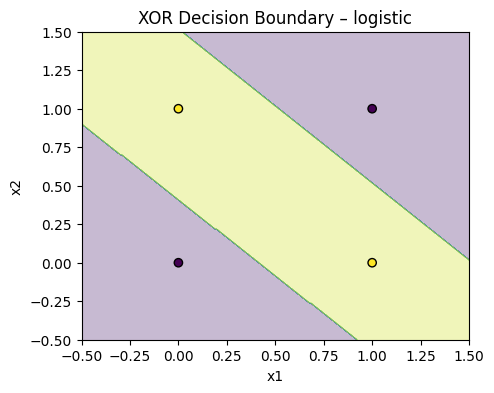

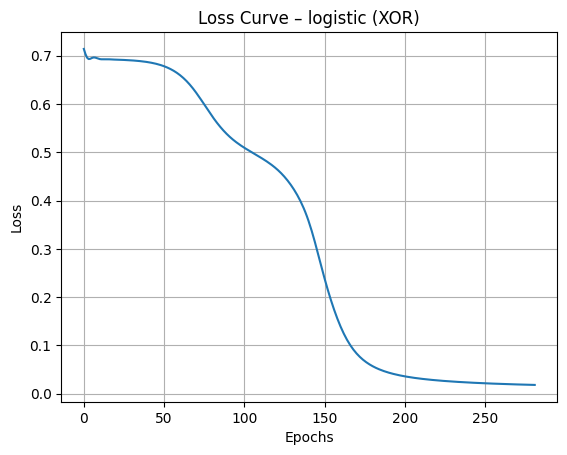

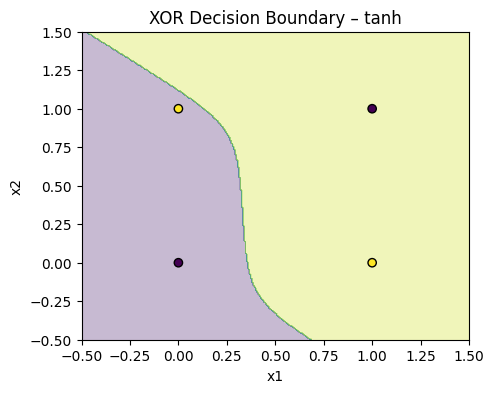

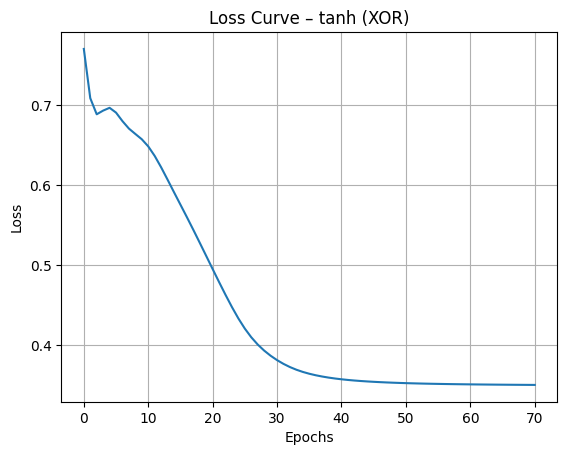

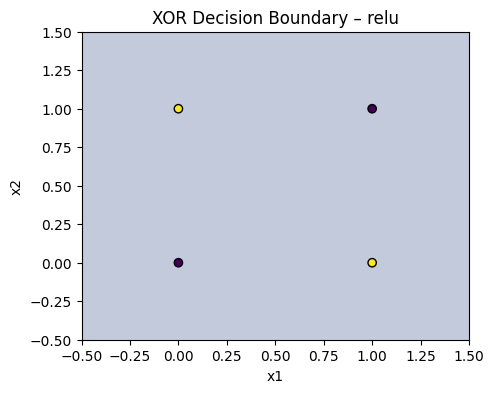

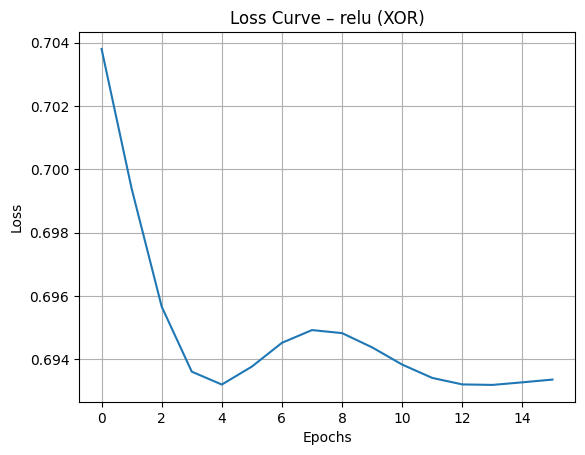

In [14]:
#Excercise:4 (Example:4)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

activations = ["logistic", "tanh", "relu"]

for act in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(2,),activation=act,solver='sgd',learning_rate_init=0.5,
                        max_iter=5000,random_state=1)
    mlp.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(-0.5,1.5,300),np.linspace(-0.5,1.5,300))

    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(f"XOR Decision Boundary – {act}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

    plt.plot(mlp.loss_curve_)
    plt.title(f"Loss Curve – {act} (XOR)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


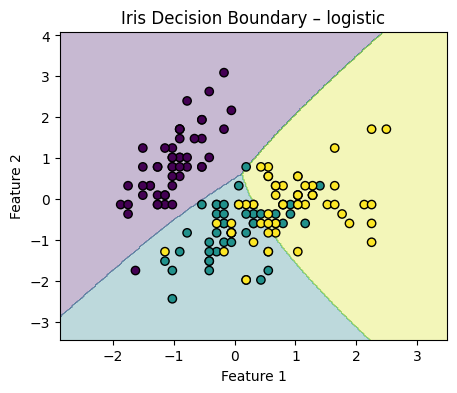

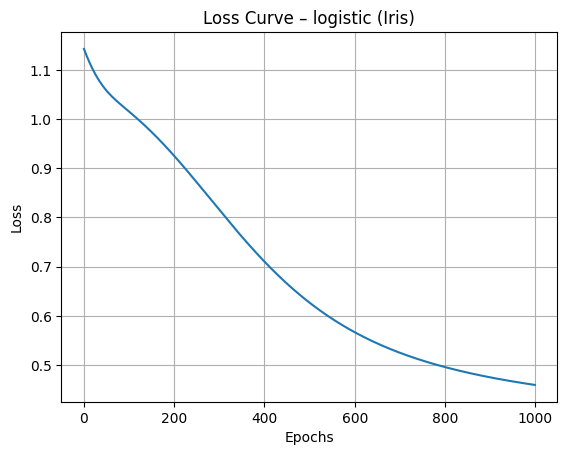

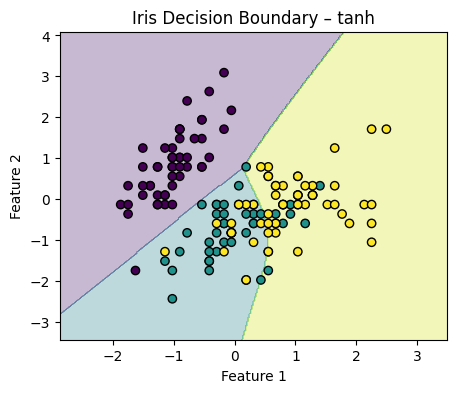

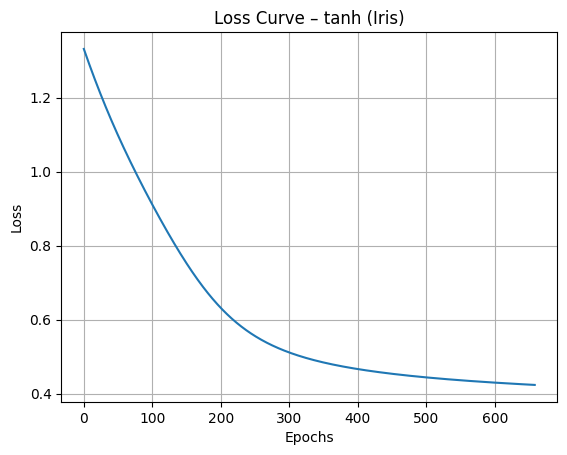

In [15]:
#Excercise:4 (Example:5)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X = iris.data[:, :2]
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
activations = ["logistic", "tanh"]

for act in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(10,),activation=act,max_iter=1000,random_state=1)

    mlp.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))

    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(f"Iris Decision Boundary – {act}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    plt.plot(mlp.loss_curve_)
    plt.title(f"Loss Curve – {act} (Iris)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


Accuracy: 0.9590643274853801


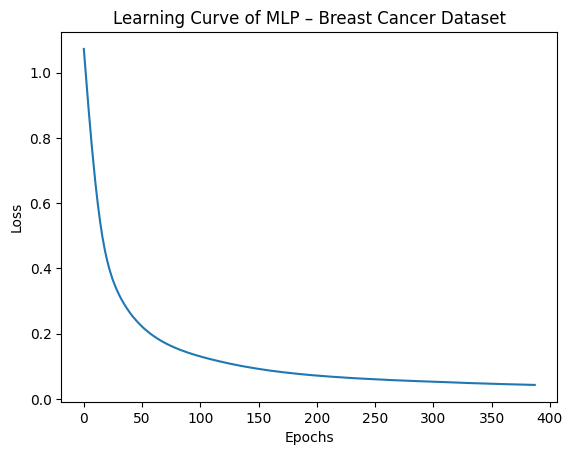

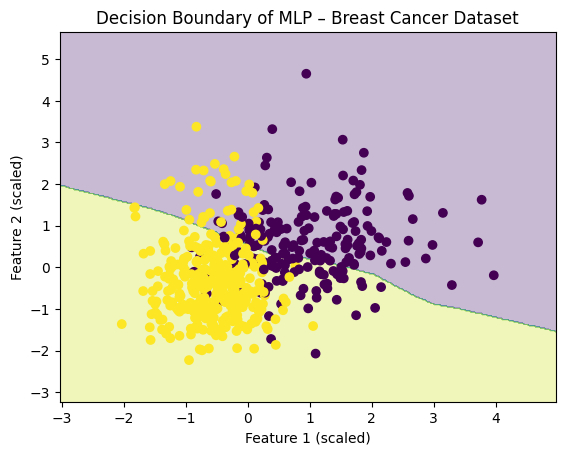

In [16]:
#Excercise:5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data=load_breast_cancer()
X=data.data
y=data.target

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

mlp=MLPClassifier(hidden_layer_sizes=(10,),activation='relu',max_iter=1000,random_state=1)
mlp.fit(X_train,y_train)

y_pred=mlp.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP – Breast Cancer Dataset")
plt.show()

x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

xx,yy=np.meshgrid(np.linspace(x_min,x_max,300),
                  np.linspace(y_min,y_max,300))

grid2d=np.c_[xx.ravel(),yy.ravel()]
mean_rest=X[:,2:].mean(axis=0)
grid_full=np.hstack((grid2d,np.tile(mean_rest,(grid2d.shape[0],1))))

Z=mlp.predict(grid_full)
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Decision Boundary of MLP – Breast Cancer Dataset")
plt.show()

Accuracy: 0.9777777777777777


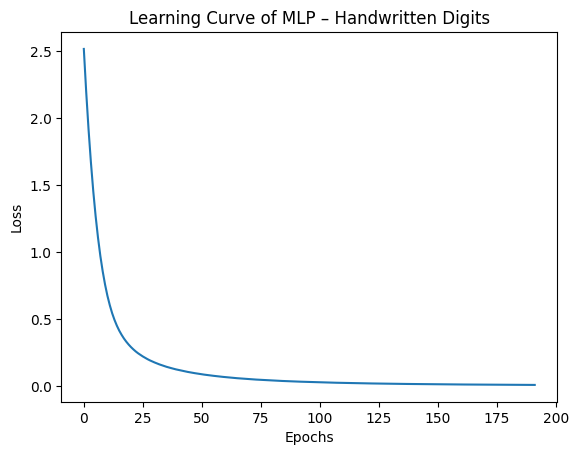

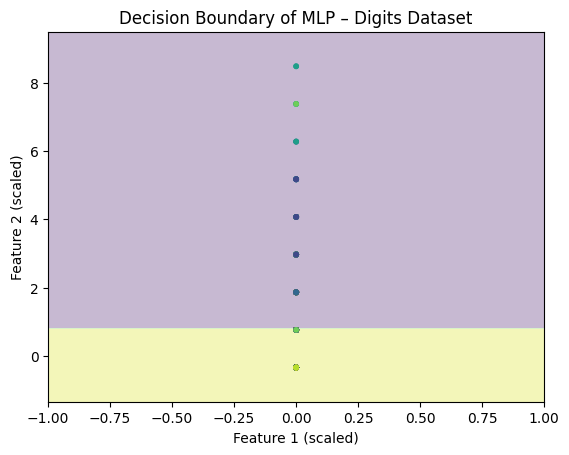

In [21]:
#Excercise:6

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data=load_digits()
X=data.data
y=data.target

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

mlp=MLPClassifier(hidden_layer_sizes=(50,),activation='relu',max_iter=1000,random_state=1)
mlp.fit(X_train,y_train)

y_pred=mlp.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP – Handwritten Digits")
plt.show()

x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

xx,yy=np.meshgrid(np.linspace(x_min,x_max,300),
                  np.linspace(y_min,y_max,300))

grid2d=np.c_[xx.ravel(),yy.ravel()]
mean_rest=X[:,2:].mean(axis=0)
grid_full=np.hstack((grid2d,np.tile(mean_rest,(grid2d.shape[0],1))))

Z=mlp.predict(grid_full)
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Decision Boundary of MLP – Digits Dataset")
plt.show()

MSE: 0.32211601618418506


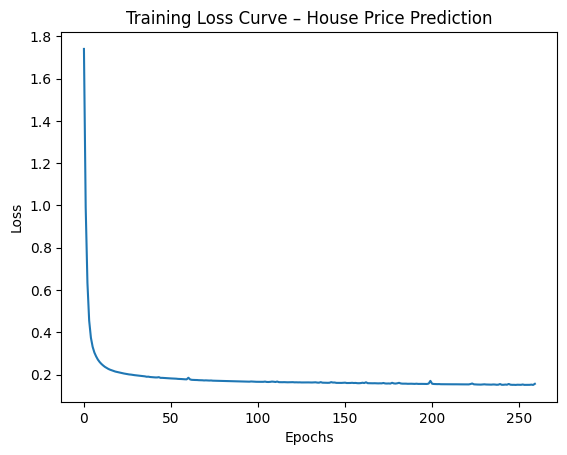

In [20]:
#Excercise:7

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data=fetch_california_housing()
X=data.data
y=data.target

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

mlp=MLPRegressor(hidden_layer_sizes=(20,),
                 activation='relu',
                 max_iter=1000,
                 random_state=1)

mlp.fit(X_train,y_train)

y_pred=mlp.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve – House Price Prediction")
plt.show()